In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import radians, sin, cos, sqrt, atan2
from cartopy import crs as ccrs
import cartopy.feature as cfeature


In [2]:
stn_ids = pd.read_fwf('http://noaa-ghcn-pds.s3.amazonaws.com/ghcnd-stations.txt', header=None, infer_nrows=1000)
stn_ids.columns = ['ID','LAT','LON','ELEV','UKN','NAME','GSN','WBAN']
stn_ids

,ID,LAT,LON,ELEV,UKN,NAME,GSN,WBAN
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,GSN,41196.0
3,AEM00041194,25.2550,55.3640,10.4,NaN,DUBAI INTL,NaN,41194.0
4,AEM00041217,24.4330,54.6510,26.8,NaN,ABU DHABI INTL,NaN,41217.0
...,...,...,...,...,...,...,...,...
129653,ZI000067969,-21.0500,29.3670,861.0,NaN,WEST NICHOLSON,NaN,67969.0
129654,ZI000067975,-20.0670,30.8670,1095.0,NaN,MASVINGO,NaN,67975.0
129655,ZI000067977,-21.0170,31.5830,430.0,NaN,BUFFALO RANGE,NaN,67977.0
129656,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE,GSN,67983.0


In [3]:
periods = pd.read_fwf('http://noaa-ghcn-pds.s3.amazonaws.com/ghcnd-inventory.txt', header=None, infer_nrows=1000)
periods.columns = ['ID','LAT','LON','ELEM','TiMIN','TiMAX']
periods

,ID,LAT,LON,ELEM,TiMIN,TiMAX
0,ACW00011604,17.1167,-61.7833,TMAX,1949,1949
1,ACW00011604,17.1167,-61.7833,TMIN,1949,1949
2,ACW00011604,17.1167,-61.7833,PRCP,1949,1949
3,ACW00011604,17.1167,-61.7833,SNOW,1949,1949
4,ACW00011604,17.1167,-61.7833,SNWD,1949,1949
...,...,...,...,...,...,...
767020,ZI000067983,-20.2000,32.6160,PRCP,1951,2025
767021,ZI000067983,-20.2000,32.6160,TAVG,1962,2025
767022,ZI000067991,-22.2170,30.0000,TMAX,1951,1990
767023,ZI000067991,-22.2170,30.0000,TMIN,1951,1990


In [4]:
merged_stns = pd.merge(stn_ids,periods,how='left',left_on='ID',right_on='ID')
merged_stns

,ID,LAT_x,LON_x,ELEV,UKN,NAME,GSN,WBAN,LAT_y,LON_y,ELEM,TiMIN,TiMAX
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,TMAX,1949.0,1949.0
1,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,TMIN,1949.0,1949.0
2,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,PRCP,1949.0,1949.0
3,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,SNOW,1949.0,1949.0
4,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,SNWD,1949.0,1949.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
767057,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE,GSN,67983.0,-20.2000,32.6160,PRCP,1951.0,2025.0
767058,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE,GSN,67983.0,-20.2000,32.6160,TAVG,1962.0,2025.0
767059,ZI000067991,-22.2170,30.0000,457.0,NaN,BEITBRIDGE,NaN,67991.0,-22.2170,30.0000,TMAX,1951.0,1990.0
767060,ZI000067991,-22.2170,30.0000,457.0,NaN,BEITBRIDGE,NaN,67991.0,-22.2170,30.0000,TMIN,1951.0,1990.0


In [5]:
WY_stns = merged_stns[merged_stns['UKN'] =='WY']
WY_stns_tp = WY_stns[(WY_stns['TiMIN']<=1991)&(WY_stns['TiMAX']>=2020)]
valid_WY_stns = WY_stns_tp[(WY_stns_tp['ELEM']=='TMAX')|(WY_stns_tp['ELEM']=='TMIN')]
valid_WY_stns

,ID,LAT_x,LON_x,ELEV,UKN,NAME,GSN,WBAN,LAT_y,LON_y,ELEM,TiMIN,TiMAX
690259,USC00480027,42.7331,-110.9217,1904.4,WY,AFTON,NaN,NaN,42.7331,-110.9217,TMAX,1957.0,2025.0
690260,USC00480027,42.7331,-110.9217,1904.4,WY,AFTON,NaN,NaN,42.7331,-110.9217,TMIN,1957.0,2025.0
690365,USC00480140,43.7728,-111.0339,1962.9,WY,ALTA 1 NNW,NaN,NaN,43.7728,-111.0339,TMAX,1909.0,2025.0
690366,USC00480140,43.7728,-111.0339,1962.9,WY,ALTA 1 NNW,NaN,NaN,43.7728,-111.0339,TMIN,1909.0,2025.0
690539,USC00480432,42.4958,-108.7317,2338.7,WY,ATLANTIC CITY,NaN,NaN,42.4958,-108.7317,TMAX,1897.0,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745915,USW00024062,43.9653,-107.9503,1278.6,WY,WORLAND MUNI AP,NaN,NaN,43.9653,-107.9503,TMIN,1960.0,2025.0
745953,USW00024088,44.2169,-104.9292,1318.3,WY,MOORCROFT 3S,NaN,NaN,44.2169,-104.9292,TMAX,1903.0,2025.0
745954,USW00024088,44.2169,-104.9292,1318.3,WY,MOORCROFT 3S,NaN,NaN,44.2169,-104.9292,TMIN,1903.0,2025.0
745975,USW00024089,42.8978,-106.4736,1621.2,WY,CASPER-NATRONA CO AP,NaN,72569.0,42.8978,-106.4736,TMAX,1948.0,2025.0


In [6]:
city_lat = 42.87
city_lon = -109.86

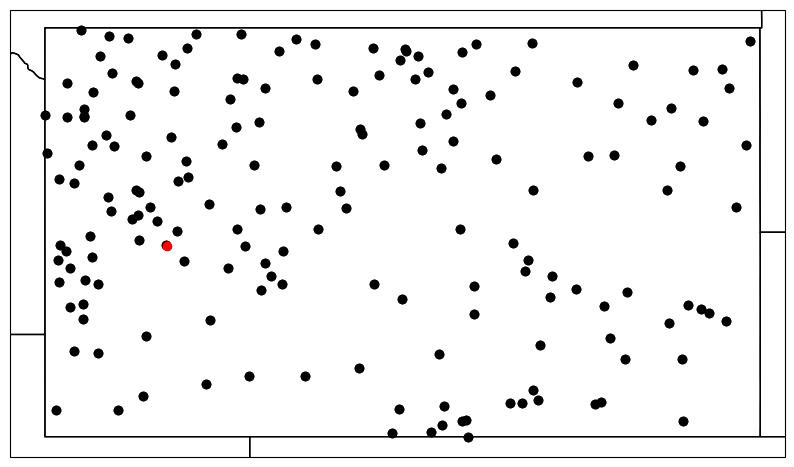

In [7]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.coastlines()
ax.add_feature(cfeature.STATES)

plt.scatter(valid_WY_stns['LON_x'],valid_WY_stns['LAT_x'], transform=ccrs.PlateCarree(), c='k')
plt.scatter(city_lon, city_lat,transform=ccrs.PlateCarree(), c='r')

In [8]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in kilometers

    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [9]:
dist_lst=[]
for n in range(valid_WY_stns.shape[0]):
    dist_lst.append(haversine(valid_WY_stns['LAT_x'].values[n], valid_WY_stns['LON_x'].values[n], city_lat, city_lon))
nearest_i = np.argmin(dist_lst)

In [10]:
id_str = valid_WY_stns.iloc[nearest_i]['ID']
print(valid_WY_stns.iloc[nearest_i]['NAME']+':'+id_str)

PINEDALE:USC00487260


In [11]:
df = pd.read_csv(
...      "s3://noaa-ghcn-pds/csv/by_station/"+id_str+".csv",
...      storage_options={"anon": True},  # passed to `s3fs.S3FileSystem`
         dtype={'Q_FLAG': 'object', 'M_FLAG': 'object'},
         parse_dates=['DATE']
... ).set_index('DATE')

/tmp/ipykernel_3524300/3010466208.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [12]:
df

,ID,ELEMENT,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME
DATE,,,,,,,
1948-08-01,USC00487260,TMAX,256,NaN,NaN,0,1700.0
1948-08-02,USC00487260,TMAX,250,NaN,NaN,0,1700.0
1948-08-03,USC00487260,TMAX,294,NaN,NaN,0,1700.0
1948-08-04,USC00487260,TMAX,261,NaN,NaN,0,1700.0
1948-08-05,USC00487260,TMAX,239,NaN,NaN,0,1700.0
...,...,...,...,...,...,...,...
2025-09-14,USC00487260,SNWD,0,NaN,NaN,H,1800.0
2025-09-15,USC00487260,SNWD,0,NaN,NaN,H,1800.0
2025-09-19,USC00487260,SNWD,0,NaN,NaN,H,1800.0


In [13]:
tmax = df[df['ELEMENT']=='TMAX']
tmin = df[df['ELEMENT']=='TMIN']

print(tmax, tmin)

                     ID ELEMENT  DATA_VALUE M_FLAG Q_FLAG S_FLAG  OBS_TIME
DATE                                                                      
1948-08-01  USC00487260    TMAX         256    NaN    NaN      0    1700.0
1948-08-02  USC00487260    TMAX         250    NaN    NaN      0    1700.0
1948-08-03  USC00487260    TMAX         294    NaN    NaN      0    1700.0
1948-08-04  USC00487260    TMAX         261    NaN    NaN      0    1700.0
1948-08-05  USC00487260    TMAX         239    NaN    NaN      0    1700.0
...                 ...     ...         ...    ...    ...    ...       ...
2025-09-14  USC00487260    TMAX         200    NaN    NaN      H    1800.0
2025-09-15  USC00487260    TMAX         178    NaN    NaN      H    1800.0
2025-09-19  USC00487260    TMAX         222    NaN    NaN      H    1800.0
2025-09-20  USC00487260    TMAX         228    NaN    NaN      H    1800.0
2025-09-21  USC00487260    TMAX         194    NaN      I      H    1800.0

[25724 rows x 7 columns]

In [14]:
tmin_max_merge = pd.merge(tmax,tmin,how='right',left_on='DATE',right_on='DATE')
tmin_max_merge

,ID_x,ELEMENT_x,DATA_VALUE_x,M_FLAG_x,Q_FLAG_x,S_FLAG_x,OBS_TIME_x,ID_y,ELEMENT_y,DATA_VALUE_y,M_FLAG_y,Q_FLAG_y,S_FLAG_y,OBS_TIME_y
DATE,,,,,,,,,,,,,,
1948-08-01,USC00487260,TMAX,256.0,NaN,NaN,0,1700.0,USC00487260,TMIN,72,NaN,NaN,0,1700.0
1948-08-02,USC00487260,TMAX,250.0,NaN,NaN,0,1700.0,USC00487260,TMIN,6,NaN,NaN,0,1700.0
1948-08-03,USC00487260,TMAX,294.0,NaN,NaN,0,1700.0,USC00487260,TMIN,6,NaN,NaN,0,1700.0
1948-08-04,USC00487260,TMAX,261.0,NaN,NaN,0,1700.0,USC00487260,TMIN,83,NaN,NaN,0,1700.0
1948-08-05,USC00487260,TMAX,239.0,NaN,NaN,0,1700.0,USC00487260,TMIN,94,NaN,NaN,0,1700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-14,USC00487260,TMAX,200.0,NaN,NaN,H,1800.0,USC00487260,TMIN,-17,NaN,NaN,H,1800.0
2025-09-15,USC00487260,TMAX,178.0,NaN,NaN,H,1800.0,USC00487260,TMIN,33,NaN,NaN,H,1800.0
2025-09-19,USC00487260,TMAX,222.0,NaN,NaN,H,1800.0,USC00487260,TMIN,-11,NaN,NaN,H,1800.0


# 1) For 1991-2020 at station, write a function that...
- Calculates:
    - All time record high and low temperatures
    - Mean high and low temperature 
- Makes pandas data frame with the columns ['record_min_temp', average_min_temp', 'average_max_temp', record_max_temp']

Demonstrate that it works.

In [46]:
def t_analysis(df, ):
    at_high = np.nanmax(df['DATA_VALUE_x'].values)/10
    at_low = np.nanmin(df['DATA_VALUE_y'].values)/10
    mean_high = np.nanmean(df['DATA_VALUE_x'].values)/10
    mean_low = np.nanmean(df['DATA_VALUE_y'].values)/10

    temp_stats_df = pd.DataFrame([at_high,at_low, mean_high, mean_low], 
                                 index=['record_max_temp', 'record_min_temp', 'average_max_temp','average_min_temp']
                                 ).T
    return(temp_stats_df)

In [47]:
temp_anal_df = t_analysis(tmin_max_merge)
temp_anal_df

,record_max_temp,record_min_temp,average_max_temp,average_min_temp
0,34.4,-45.0,11.30371,-6.250275


# 2) Plot (using matplotlib) record, average, and actual high and low temperatures for that year and city.

In [48]:
year = tmin_max_merge.iloc[(tmin_max_merge.index.year == 2020)]
year

,ID_x,ELEMENT_x,DATA_VALUE_x,M_FLAG_x,Q_FLAG_x,S_FLAG_x,OBS_TIME_x,ID_y,ELEMENT_y,DATA_VALUE_y,M_FLAG_y,Q_FLAG_y,S_FLAG_y,OBS_TIME_y
DATE,,,,,,,,,,,,,,
2020-01-01,USC00487260,TMAX,-50.0,NaN,NaN,7,1800.0,USC00487260,TMIN,-94,NaN,NaN,7,1800.0
2020-01-02,USC00487260,TMAX,-22.0,NaN,NaN,7,1800.0,USC00487260,TMIN,-111,NaN,NaN,7,1800.0
2020-01-03,USC00487260,TMAX,11.0,NaN,NaN,7,1800.0,USC00487260,TMIN,-161,NaN,NaN,7,1800.0
2020-01-04,USC00487260,TMAX,-33.0,NaN,NaN,7,1800.0,USC00487260,TMIN,-167,NaN,NaN,7,1800.0
2020-01-05,USC00487260,TMAX,-56.0,NaN,NaN,7,1800.0,USC00487260,TMIN,-178,NaN,NaN,7,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,USC00487260,TMAX,-11.0,NaN,NaN,7,1800.0,USC00487260,TMIN,-122,NaN,NaN,7,1800.0
2020-12-28,USC00487260,TMAX,-39.0,NaN,NaN,7,1800.0,USC00487260,TMIN,-233,NaN,NaN,7,1800.0
2020-12-29,USC00487260,TMAX,-28.0,NaN,NaN,7,1800.0,USC00487260,TMIN,-244,NaN,NaN,7,1800.0


Text(0.5, 1.0, 'At Pinedale, WY')

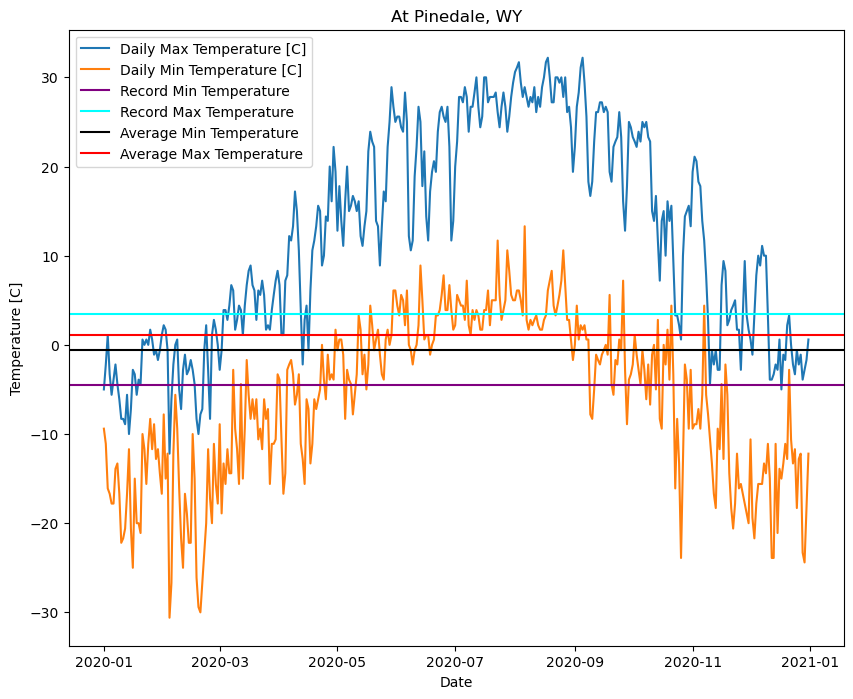

In [56]:
plt.subplots(figsize=(10,8))
plt.plot(year['DATA_VALUE_x']/10, label='Daily Max Temperature [C]')
plt.plot(year['DATA_VALUE_y']/10, label='Daily Min Temperature [C]')
plt.axhline(y=temp_anal_df['record_min_temp'][0]/10, c='purple',label='Record Min Temperature')
plt.axhline(y=temp_anal_df['record_max_temp'][0]/10, c='cyan',label='Record Max Temperature')
plt.axhline(y=temp_anal_df['average_min_temp'][0]/10, c='k', label='Average Min Temperature')
plt.axhline(y=temp_anal_df['average_max_temp'][0]/10, c='red',label='Average Max Temperature')
plt.legend(loc='upper left')

plt.xlabel('Date')
plt.ylabel('Temperature [C]')
plt.title('At Pinedale, WY')